In [ ]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install seaborn --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 17.6 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.47.1
    Uninstalling transformers-4.47.1:
      Successfully uninstalled transformers-4.47.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.6/336.6 kB 17.1 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.2.1
    Uninstalling accelerate-1.2.1:
      Successfully uninstalled accelerate-1.2.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 20.2 MB/s eta 0:00:00
  Attempti

In [ ]:
import pandas as pd
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


,0
review,0
sentiment,0


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


#Dataset Analysis


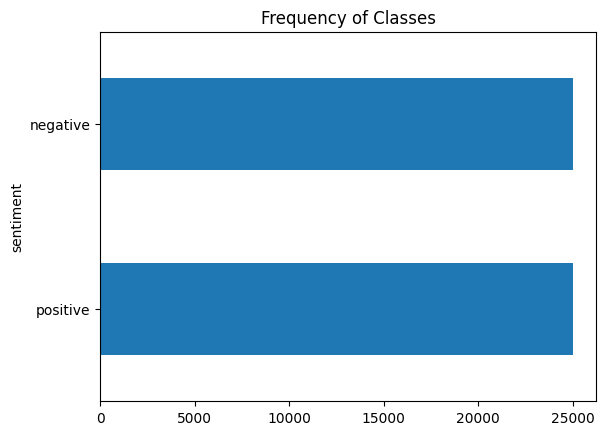

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
label_counts = df['sentiment'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title("Frequency of Classes")
plt.show()

<Axes: title={'center': 'Words per Review'}, xlabel='sentiment'>

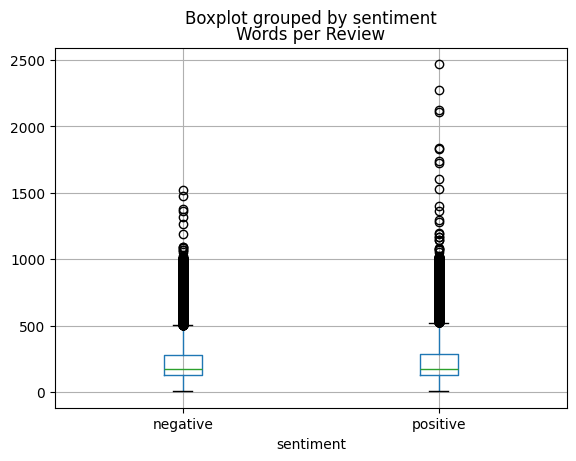

In [ ]:
df['Words per Review'] = df['review'].str.split().apply(len)
df.boxplot("Words per Review", by="sentiment")

#Text to Token Conversion


In [ ]:
from transformers import AutoTokenizer

In [ ]:
model_ckpt = "distilbert-base-uncased"  #ENGLISH english
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

text = "We love to sleep! Winters are awesome!"
encoded_text = tokenizer(text, truncation = True)
print(encoded_text)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

{'input_ids': [101, 2057, 2293, 2000, 3637, 999, 12214, 2024, 12476, 999, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
len(tokenizer.vocab),tokenizer.vocab_size, tokenizer.model_max_length

(30522, 30522, 512)

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, stratify=df['sentiment'])
test, validation = train_test_split(test, test_size=1/3, stratify=test['sentiment'])
train.shape, test.shape, validation.shape

((35000, 3), (10000, 3), (5000, 3))

In [ ]:
from datasets import Dataset, DatasetDict

dataset = DatasetDict({
    "train": Dataset.from_pandas(train, preserve_index=False),
    "test": Dataset.from_pandas(test, preserve_index=False),
    "validation": Dataset.from_pandas(validation, preserve_index=False)
})

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['review', 'sentiment', 'Words per Review'],
        num_rows: 35000
    })
    test: Dataset({
        features: ['review', 'sentiment', 'Words per Review'],
        num_rows: 10000
    })
    validation: Dataset({
        features: ['review', 'sentiment', 'Words per Review'],
        num_rows: 5000
    })
})

#Tokenization of emotion/sentiment data

In [ ]:
dataset['train'][0]

{'review': 'This is a very moving picture about 3 forty-something best friends in a small england town. One finds a passionate loves and a new beginning with a younger piano instructor, When tragedy strikes and hearts are changed forever. Definitely a film to have a box of tissues with you! A powerful piece of work. This is definitely one of my favorite films of all time.<br /><br />*SPOILER!!! SPOILER ALERT!! SPOILER!!*<br /><br />The main character is taken by her young, handsome piano instructor and a passionate romance blossoms. Her two jealous "friends" play an immature prank which quickly leads to tragedy. She loses her love and her friends in one foul swoop. In the end a unexpected surprise pulls them back together.(in my opinion her forgiveness is not warranted)',
 'sentiment': 'positive',
 'Words per Review': 128}

In [ ]:
label2id = {"negative": 0, "positive": 1}
id2label = {v: k for k, v in label2id.items()}
num_labels = len(label2id)

In [ ]:
def tokenize(batch):
    temp= tokenizer(batch['review'], padding=True, truncation=True, return_token_type_ids=True,)
    temp['labels'] = [label2id[label] for label in batch['sentiment']]
    return temp

print(tokenize(dataset['train'][:2]))

{'input_ids': [[101, 2023, 2003, 1037, 2200, 3048, 3861, 2055, 1017, 5659, 1011, 2242, 2190, 2814, 1999, 1037, 2235, 2563, 2237, 1012, 2028, 4858, 1037, 13459, 7459, 1998, 1037, 2047, 2927, 2007, 1037, 3920, 3682, 9450, 1010, 2043, 10576, 9326, 1998, 8072, 2024, 2904, 5091, 1012, 5791, 1037, 2143, 2000, 2031, 1037, 3482, 1997, 14095, 2007, 2017, 999, 1037, 3928, 3538, 1997, 2147, 1012, 2023, 2003, 5791, 2028, 1997, 2026, 5440, 3152, 1997, 2035, 2051, 1012, 1026, 7987, 1013, 1028, 1026, 7987, 1013, 1028, 1008, 27594, 2121, 999, 999, 999, 27594, 2121, 9499, 999, 999, 27594, 2121, 999, 999, 1008, 1026, 7987, 1013, 1028, 1026, 7987, 1013, 1028, 1996, 2364, 2839, 2003, 2579, 2011, 2014, 2402, 1010, 8502, 3682, 9450, 1998, 1037, 13459, 7472, 28766, 1012, 2014, 2048, 9981, 1000, 2814, 1000, 2377, 2019, 26838, 26418, 2029, 2855, 5260, 2000, 10576, 1012, 2016, 12386, 2014, 2293, 1998, 2014, 2814, 1999, 2028, 12487, 25430, 18589, 1012, 1999, 1996, 2203, 1037, 9223, 4474, 8005, 2068, 2067, 2362, 

In [ ]:
emotion_encoded=dataset.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/35000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModel
import torch

In [ ]:
model= AutoModel.from_pretrained(model_ckpt)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
model

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

In [ ]:
model.config
model_two="distilbert-base-cased"

In [ ]:
from transformers import AutoModelForSequenceClassification

# Load DistilBERT with a classification head (2 classes for sentiment analysis)
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoConfig
Num_labels = len(label2id)
device = torch.device ("cuda" if torch. cuda.is_available() else "cpu")
config = AutoConfig.from_pretrained(model_ckpt, label2id=label2id, id2label=id2label)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
device

device(type='cuda')

In [ ]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [ ]:
from transformers import TrainingArguments

batch_size=8
training_dir = "distilbert_base_training_dir"
training_args= TrainingArguments(output_dir = training_dir,
              overwrite_output_dir = True,
              num_train_epochs = 1,
              learning_rate = 2e-5,
              per_device_train_batch_size = batch_size,
              per_device_eval_batch_size = batch_size,
              weight_decay = 0.01,
              evaluation_strategy = 'epoch',
              disable_tqdm = False
    )

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
! pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 6.4 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics (pred) :
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

#Build Model and Trainer

In [ ]:
from transformers import Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=emotion_encoded['train'],
    eval_dataset=emotion_encoded['validation'],
    compute_metrics=compute_metrics,
    tokenizer=tokenizer
)

<ipython-input-28-f7f22c6f6a80>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.219900,0.234261,0.931600,0.931600


TrainOutput(global_step=4375, training_loss=0.2775709420340402, metrics={'train_runtime': 2250.4681, 'train_samples_per_second': 15.552, 'train_steps_per_second': 1.944, 'total_flos': 4636358952960000.0, 'train_loss': 0.2775709420340402, 'epoch': 1.0})

In [ ]:
preds_output = trainer.predict(emotion_encoded[ 'test'])
preds_output.metrics

{'test_loss': 0.24380218982696533,
 'test_accuracy': 0.9277,
 'test_f1': 0.9276999934929995,
 'test_runtime': 152.7495,
 'test_samples_per_second': 65.467,
 'test_steps_per_second': 8.183}

In [ ]:
preds_output.predictions

array([[ 2.5538921, -2.2807674],
       [ 3.2433414, -2.9763398],
       [ 2.969288 , -2.5955515],
       ...,
       [-2.7929425,  2.8862247],
       [-2.6320615,  2.6685152],
       [ 3.0476637, -2.7666345]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true =  [label2id[label] for label in emotion_encoded['test'][:]['sentiment']]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5000
           1       0.93      0.93      0.93      5000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [ ]:
label2id

{'negative': 0, 'positive': 1}

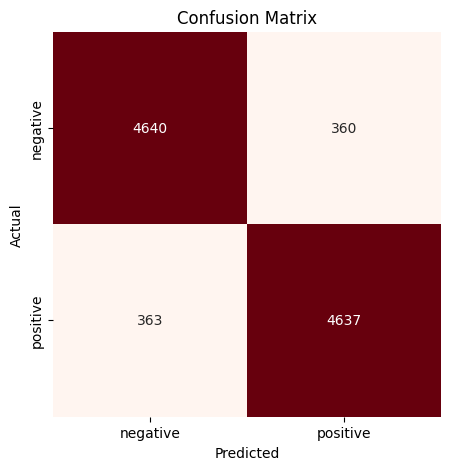

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, xticklabels=label2id.keys(), yticklabels=label2id.keys(), fmt ='d', cbar=False, cmap='Reds')
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.show()

#Build Prediction Function and save model

In [ ]:
text = "I am super happy today. I got it done. Finally!!"
def get_prediction (text) :
    input_encoded = tokenizer(text, return_tensors='pt').to(device)
    with torch.no_grad():
      outputs = model(**input_encoded)
    logits = outputs. logits
    pred = torch.argmax(logits, dim=1) .item()
    return id2label[pred]
get_prediction (text)

'positive'

In [ ]:
# model_name = r"C:\Users\kumar\C++\flask_basic app"
# tokenizer.save_pretrained(model_name)
# model.save_pretrained(model_name)

# trainer.save_model("distilbert-base-uncased-sentiment-model")

trainer.save_model("distilbert-base-uncased-sentiment-model")

In [ ]:
from transformers import pipeline
classifier = pipeline('text-classification', model= 'distilbert-base-uncased-sentiment-model')
classifier([text, 'A very bad day indeed', "We loved mth111", "I am feeling depressed"])

Device set to use cuda:0


[{'label': 'positive', 'score': 0.9944326281547546},
 {'label': 'negative', 'score': 0.9621518850326538},
 {'label': 'positive', 'score': 0.9709897637367249},
 {'label': 'negative', 'score': 0.9352971315383911}]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

model_save_path = "/content/drive/MyDrive/distilbert-base-uncased-sentiment-model"
trainer.save_model(model_save_path)

Mounted at /content/drive
